In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

from pydataset import data
from wrangle_mall import acquire_mall
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from wrangle_zillow import wrangle_zillow

# Exercises

## Clustering with the Iris Dataset
### Using this lesson as a guide, perform clustering on the iris dataset.

#### Choose features other than the ones used in the lesson.

In [2]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
alt_df = df.copy()
alt_df = alt_df.rename(columns={'Sepal.Length':'sepal_length','Sepal.Width':'sepal_width', 'Species':'species', 'Petal.Length':'petal_length', 'Petal.Width':'petal_width'})
alt_df = alt_df.drop(columns={'petal_length', 'petal_width'})
alt_df.head()

,sepal_length,sepal_width,species
1,5.1,3.5,setosa
2,4.9,3.0,setosa
3,4.7,3.2,setosa
4,4.6,3.1,setosa
5,5.0,3.6,setosa


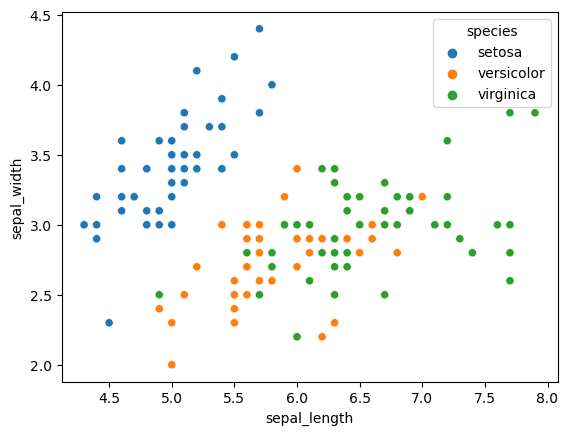

In [4]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=alt_df)
plt.show()

In [5]:
alt_df = alt_df.drop(columns='species')

In [6]:
km = KMeans(n_clusters=3)
km.fit(alt_df)

clusters = km.predict(alt_df)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [7]:
df['cluster'] = clusters
df.sample(25)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,cluster
45,5.1,3.8,1.9,0.4,setosa,2
68,5.8,2.7,4.1,1.0,versicolor,1
143,5.8,2.7,5.1,1.9,virginica,1
104,6.3,2.9,5.6,1.8,virginica,0
41,5.0,3.5,1.3,0.3,setosa,2
103,7.1,3.0,5.9,2.1,virginica,0
80,5.7,2.6,3.5,1.0,versicolor,1
100,5.7,2.8,4.1,1.3,versicolor,1
11,5.4,3.7,1.5,0.2,setosa,2
74,6.1,2.8,4.7,1.2,versicolor,1


#### Visualize the results of your clustering.

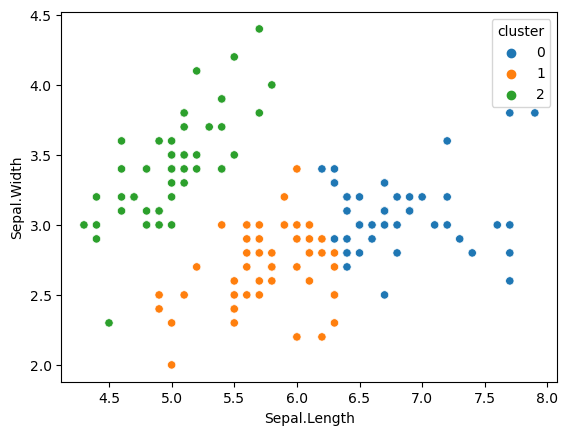

In [8]:
sns.scatterplot(x='Sepal.Length', y='Sepal.Width', hue='cluster', data=df, palette='tab10')
plt.show()

#### Use the elbow method to visually select a good value for k.

In [9]:
elbow_df = df.copy()
elbow_df = elbow_df.drop(columns='Species')

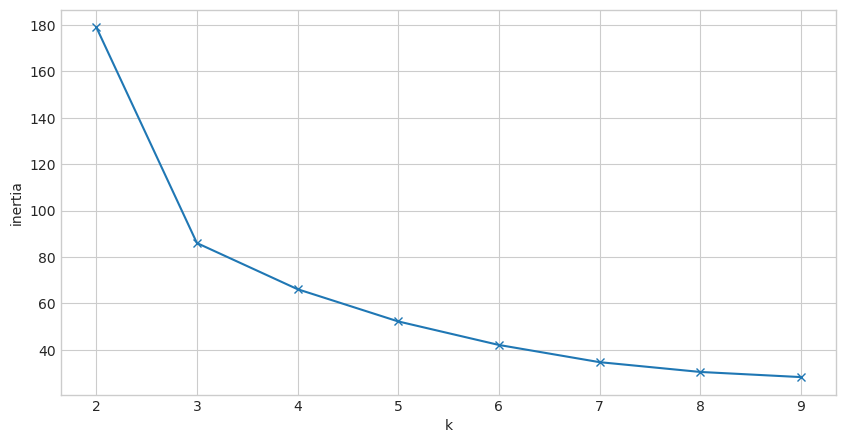

In [10]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,5))
    pd.Series({k: KMeans(k).fit(elbow_df).inertia_ for k in range(2, 10)}).plot(marker='x')
    plt.xticks(range(2, 10))
    plt.xlabel('k')
    plt.ylabel('inertia')

#### Repeat the clustering, this time with 3 different features.

In [11]:
alt_df2 = df.copy()
alt_df2 = alt_df2.drop(columns={'Petal.Length', 'Species'})
alt_df2 = alt_df2.rename(columns={'Sepal.Length':'sepal_length','Sepal.Width':'sepal_width', 'Petal.Width':'petal_width'})
alt_df2.head()

,sepal_length,sepal_width,petal_width,cluster
1,5.1,3.5,0.2,2
2,4.9,3.0,0.2,2
3,4.7,3.2,0.2,2
4,4.6,3.1,0.2,2
5,5.0,3.6,0.2,2


In [12]:
km = KMeans(n_clusters=4)
km.fit(alt_df2)

clusters = km.predict(alt_df2)
clusters

array([3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3,
       3, 0, 3, 0, 3, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [13]:
df['cluster'] = clusters
df.sample(25)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,cluster
77,6.8,2.8,4.8,1.4,versicolor,2
98,6.2,2.9,4.3,1.3,versicolor,1
145,6.7,3.3,5.7,2.5,virginica,2
8,5.0,3.4,1.5,0.2,setosa,3
114,5.7,2.5,5.0,2.0,virginica,1
104,6.3,2.9,5.6,1.8,virginica,2
67,5.6,3.0,4.5,1.5,versicolor,1
95,5.6,2.7,4.2,1.3,versicolor,1
122,5.6,2.8,4.9,2.0,virginica,1
139,6.0,3.0,4.8,1.8,virginica,1


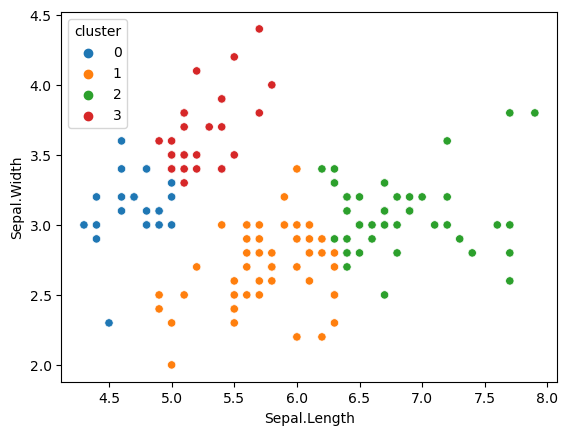

In [14]:
sns.scatterplot(x='Sepal.Length', y='Sepal.Width', hue='cluster', data=df, palette='tab10')
plt.show()

## Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [15]:
mall = acquire_mall()
mall

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [16]:
mall = mall.drop(columns='customer_id')
mall['gender'] = mall['gender'].replace('Female', 0)
mall['gender'] = mall['gender'].replace('Male', 1)

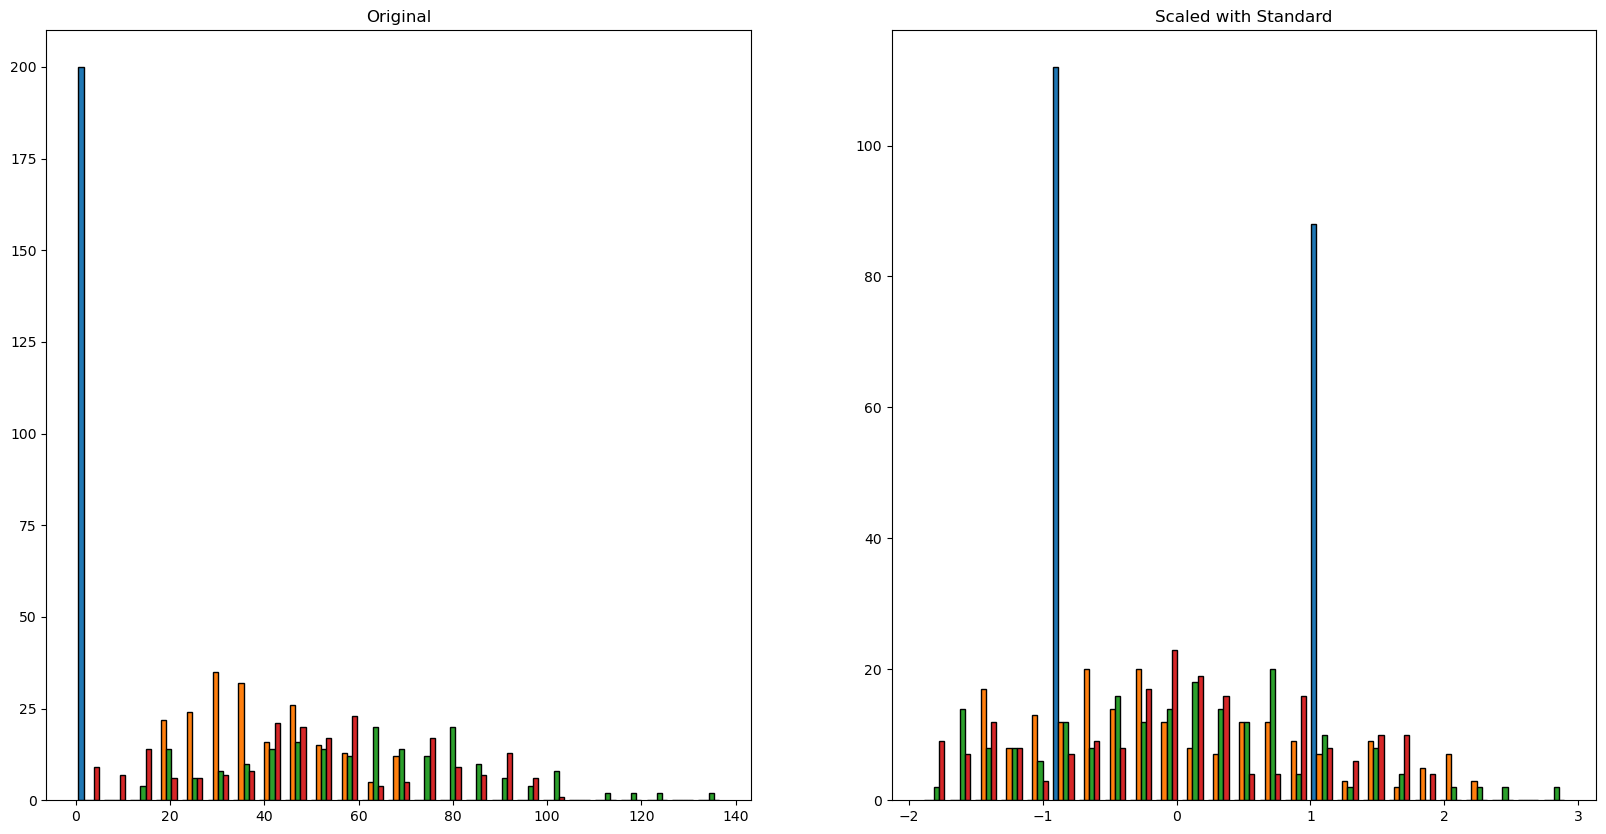

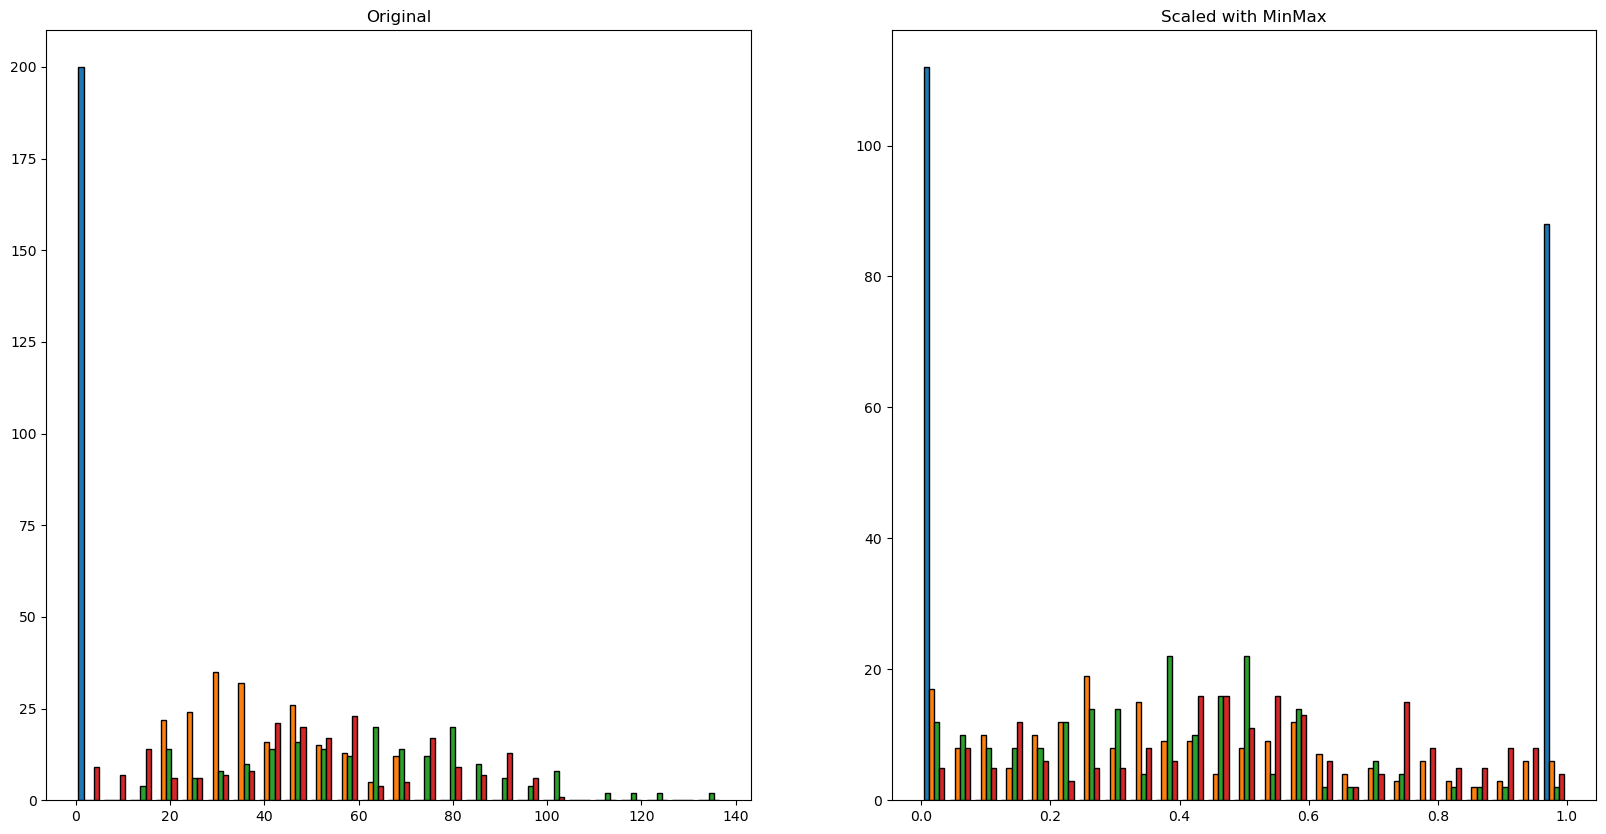

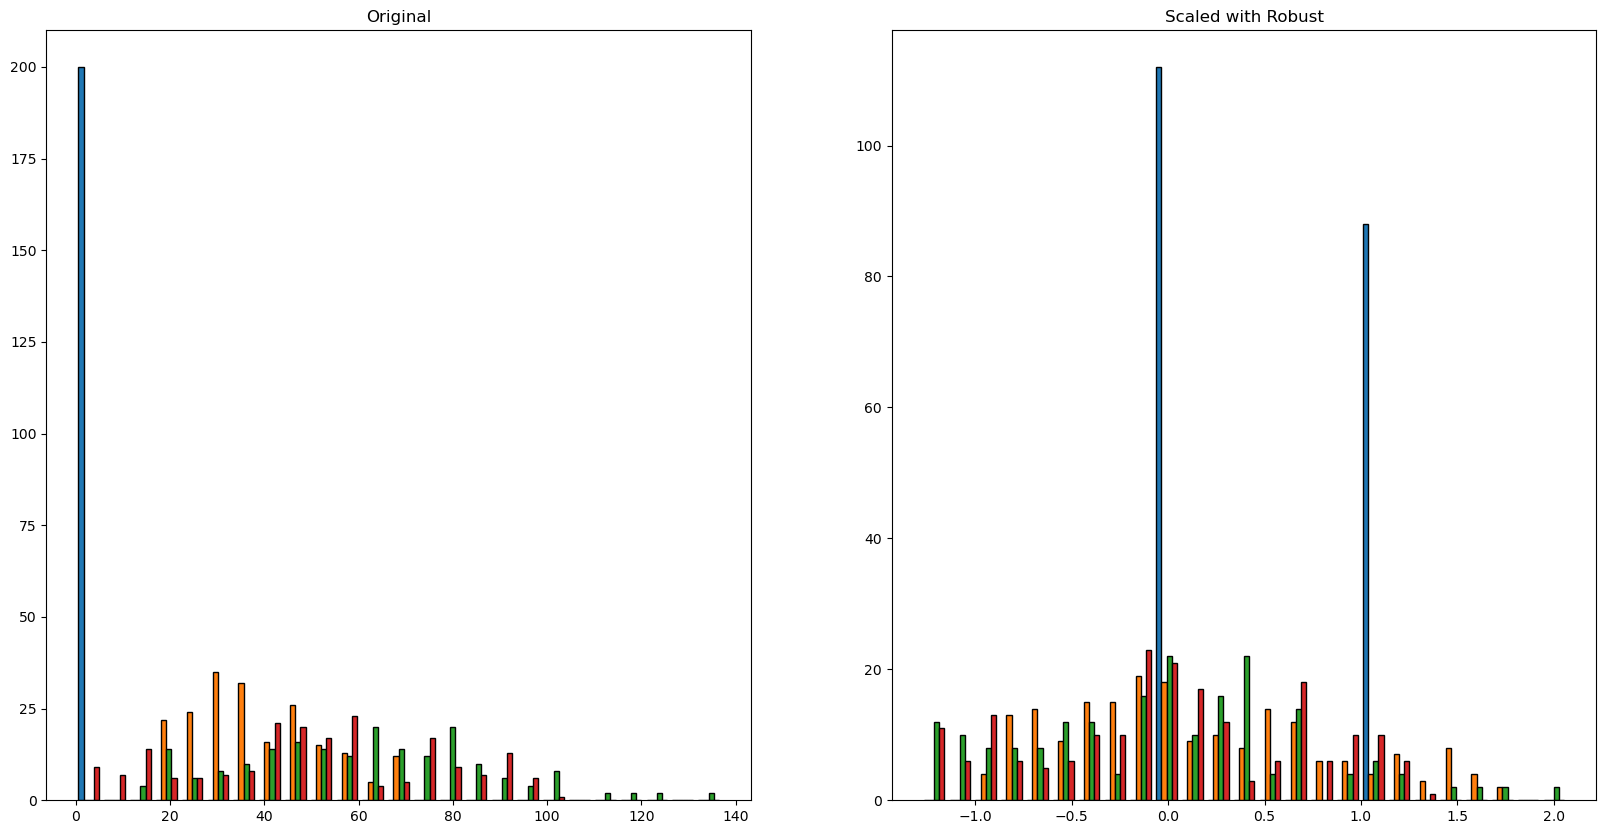

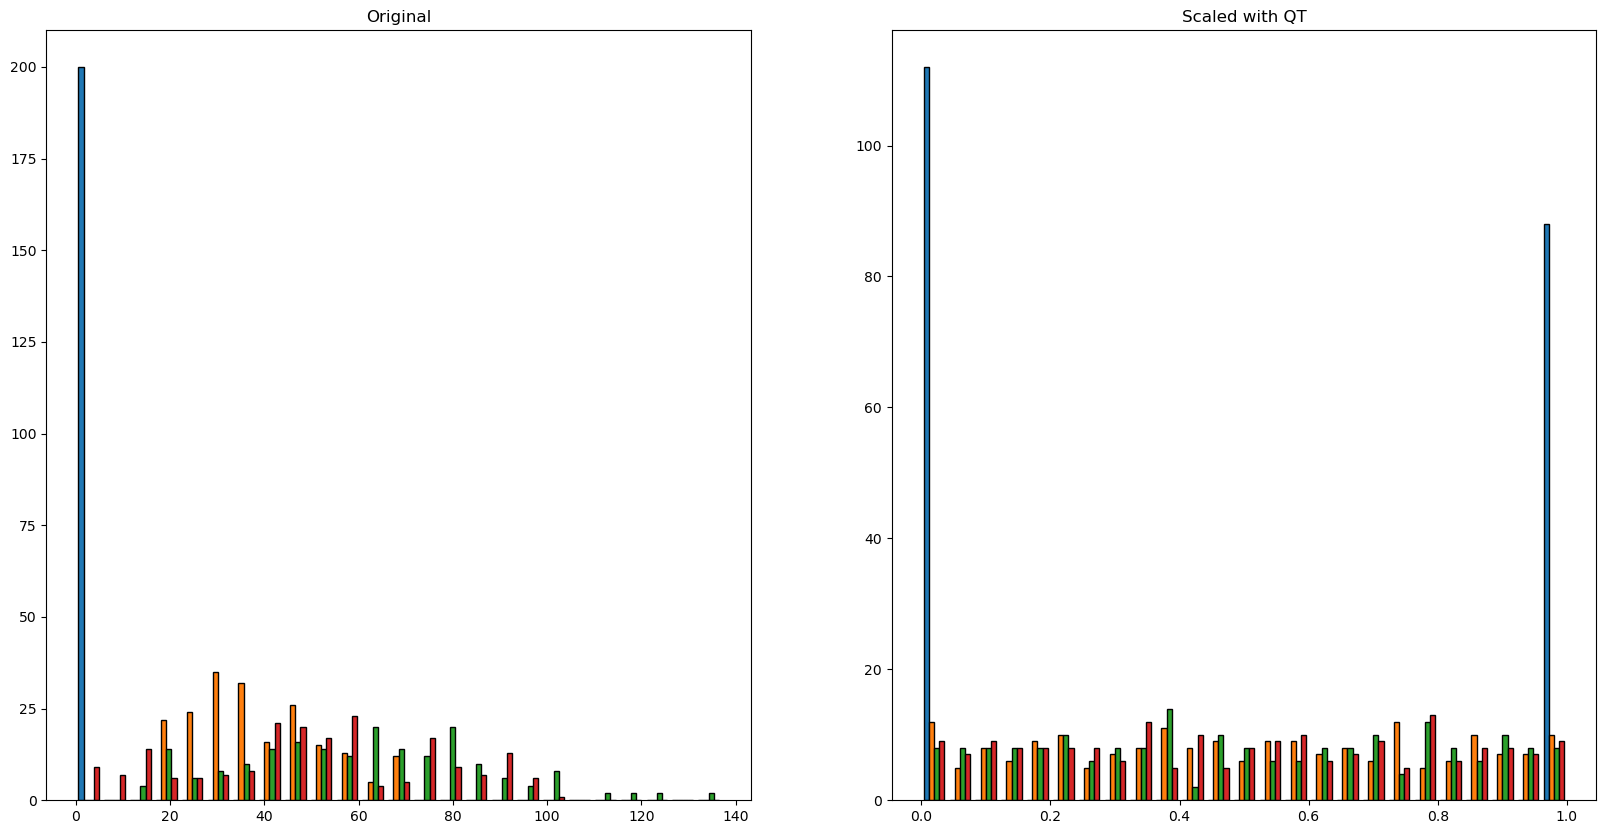

In [17]:
scaler = StandardScaler()
scaler.fit(mall)
mall_scaled = scaler.transform(mall)


plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.hist(mall, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(mall_scaled, bins=25, ec='black')
plt.title('Scaled with Standard')
plt.show()


scaler = MinMaxScaler()
scaler.fit(mall)
mall_scaled = scaler.transform(mall)


plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.hist(mall, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(mall_scaled, bins=25, ec='black')
plt.title('Scaled with MinMax')
plt.show()


scaler = RobustScaler()
scaler.fit(mall)
mall_scaled = scaler.transform(mall)


plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.hist(mall, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(mall_scaled, bins=25, ec='black')
plt.title('Scaled with Robust')
plt.show()


scaler = QuantileTransformer()
scaler.fit(mall)
mall_scaled = scaler.transform(mall)


plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.hist(mall, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(mall_scaled, bins=25, ec='black')
plt.title('Scaled with QT')
plt.show()

In [18]:
mall

,gender,age,annual_income,spending_score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


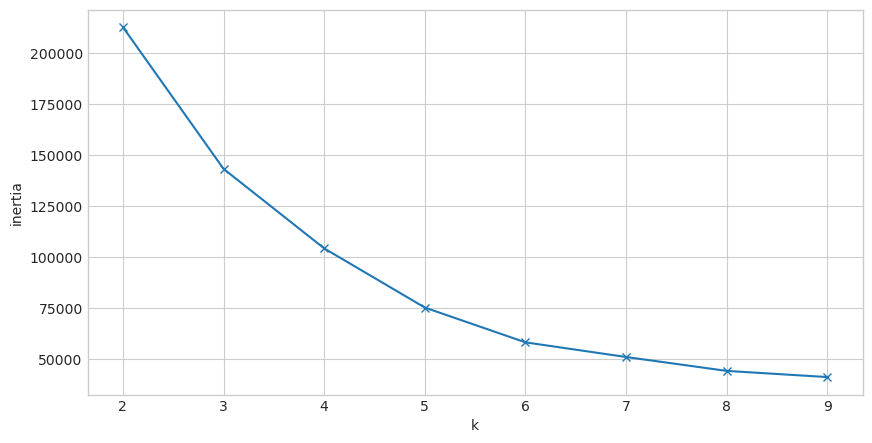

In [19]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,5))
    pd.Series({k: KMeans(k).fit(mall).inertia_ for k in range(2, 10)}).plot(marker='x')
    plt.xticks(range(2, 10))
    plt.xlabel('k')
    plt.ylabel('inertia')

In [20]:
km = KMeans(n_clusters=5)
km.fit(mall)

clusters = km.predict(mall)
clusters

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [21]:
mall['cluster'] = clusters
mall.sample(25)

,gender,age,annual_income,spending_score,cluster
7,0,23,18,94,3
52,0,31,43,54,4
129,1,38,71,75,0
90,0,68,59,55,4
0,1,19,15,39,1
64,1,63,48,51,4
168,0,36,87,27,2
36,0,42,34,17,1
26,0,45,28,32,1
15,1,22,20,79,3


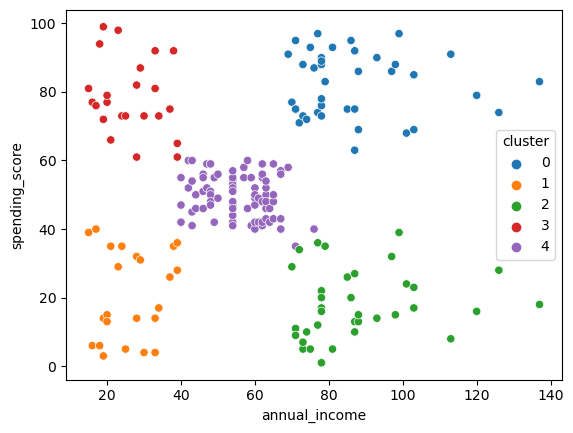

In [22]:
sns.scatterplot(x='annual_income', y='spending_score', hue='cluster', data=mall, palette='tab10')
plt.show()

## How does scaling impact the results of clustering?

### Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

#### Scaled

In [23]:
zillow = wrangle_zillow()
zillow.head()

,baths,beds,county,latitude,longitude,build_year,home_value,logerror,mail_id
0,3.5,4,6059,33634931,-117869207,1998,1023282,0.025595,14297519
1,1.0,2,6111,34449266,-119281531,1967,464000,0.055619,17052889
2,2.0,3,6059,33886168,-117823170,1962,564778,0.005383,14186244
3,3.0,4,6037,34245180,-118240722,1970,145143,-0.103410,12177905
6,3.0,4,6037,34145202,-118179824,1950,773303,-0.001011,12095076


In [24]:
zillow = zillow.drop(columns={'county', 'mail_id', 'logerror', 'latitude', 'longitude'})

In [25]:
zillow

,baths,beds,build_year,home_value
0,3.5,4,1998,1023282
1,1.0,2,1967,464000
2,2.0,3,1962,564778
3,3.0,4,1970,145143
6,3.0,4,1950,773303
...,...,...,...,...
77573,2.0,4,1962,346534
77575,2.0,2,1940,354621
77576,2.0,4,1964,67205
77577,1.0,3,1954,49546


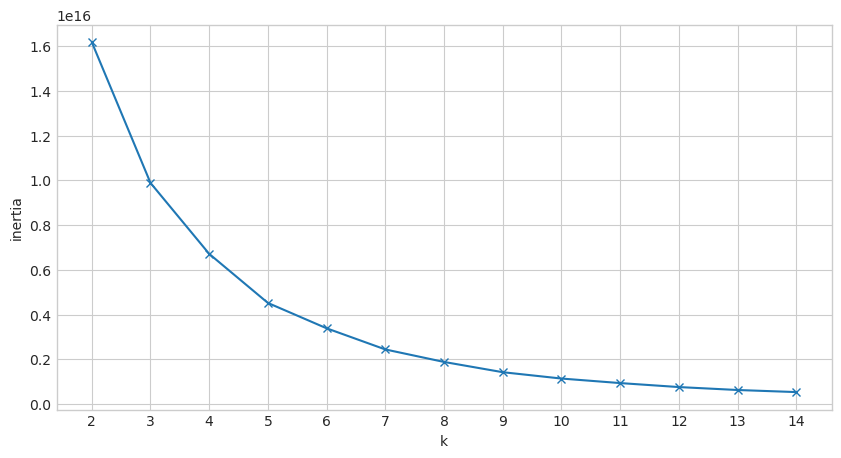

In [26]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,5))
    pd.Series({k: KMeans(k).fit(zillow).inertia_ for k in range(2, 15)}).plot(marker='x')
    plt.xticks(range(2, 15))
    plt.xlabel('k')
    plt.ylabel('inertia')

In [27]:
scaler = MinMaxScaler()
scaler.fit(zillow)
zillow_scaled = scaler.transform(zillow)

In [28]:
zillow_scaled = pd.DataFrame(zillow_scaled, columns=['baths', 'beds', 'build_year', 'home_value'])

In [29]:
zillow_scaled

,baths,beds,build_year,home_value
0,0.194444,0.285714,0.869565,0.020837
1,0.055556,0.142857,0.644928,0.009437
2,0.111111,0.214286,0.608696,0.011492
3,0.166667,0.285714,0.666667,0.002938
4,0.166667,0.285714,0.521739,0.015742
...,...,...,...,...
52433,0.111111,0.285714,0.608696,0.007043
52434,0.111111,0.142857,0.449275,0.007208
52435,0.111111,0.285714,0.623188,0.001349
52436,0.055556,0.214286,0.550725,0.000990


In [30]:
km = KMeans(n_clusters=7)
km.fit(zillow_scaled)

clusters = km.predict(zillow_scaled)
clusters

array([5, 0, 0, ..., 3, 0, 0], dtype=int32)

In [31]:
zillow_scaled['cluster'] = clusters
zillow_scaled.sample(25)

,baths,beds,build_year,home_value,cluster
21360,0.166667,0.285714,0.673913,0.015002,1
45534,0.166667,0.285714,0.710145,0.002730,1
28829,0.111111,0.214286,0.318841,0.003552,6
25225,0.111111,0.142857,0.550725,0.002355,0
17455,0.194444,0.214286,0.927536,0.022707,2
44041,0.055556,0.142857,0.304348,0.011925,6
25534,0.222222,0.357143,0.586957,0.018002,3
49217,0.166667,0.214286,0.804348,0.014204,2
19904,0.111111,0.214286,0.615942,0.011598,0
11897,0.083333,0.214286,0.623188,0.006323,0


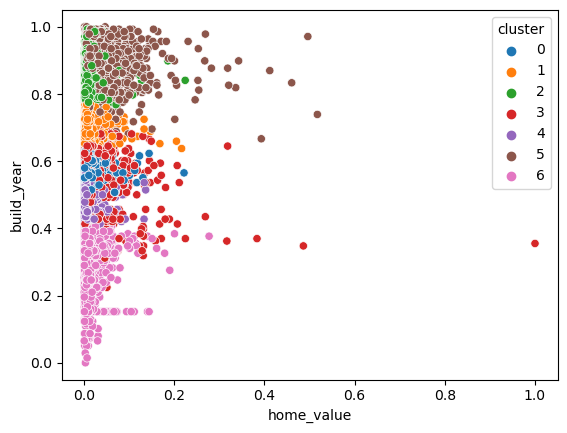

In [38]:
sns.scatterplot(x='home_value', y='build_year', hue='cluster', data=zillow_scaled, palette='tab10')
plt.show()

#### Unscaled

In [33]:
zillow = wrangle_zillow()
zillow = zillow.drop(columns={'county', 'mail_id', 'logerror', 'latitude', 'longitude'})

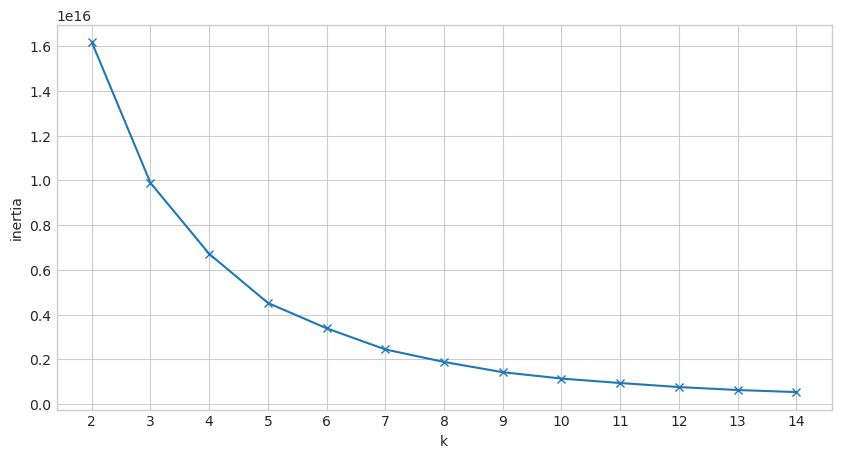

In [34]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,5))
    pd.Series({k: KMeans(k).fit(zillow).inertia_ for k in range(2, 15)}).plot(marker='x')
    plt.xticks(range(2, 15))
    plt.xlabel('k')
    plt.ylabel('inertia')

In [35]:
km = KMeans(n_clusters=7)
km.fit(zillow)

clusters = km.predict(zillow)
clusters

array([0, 6, 6, ..., 1, 1, 6], dtype=int32)

In [36]:
zillow['cluster'] = clusters
zillow.sample(25)

,baths,beds,build_year,home_value,cluster
6930,3.0,4,1976,408583,1
39292,1.0,3,1929,294232,1
34782,2.5,3,1990,353674,1
66290,1.0,2,1950,56897,1
51873,2.0,4,1968,440098,6
73638,5.0,5,2011,1306045,0
43876,1.0,2,1926,461000,6
2634,3.0,5,1972,1141991,0
66851,2.0,4,1974,611354,6
44191,2.0,2,1949,123374,1


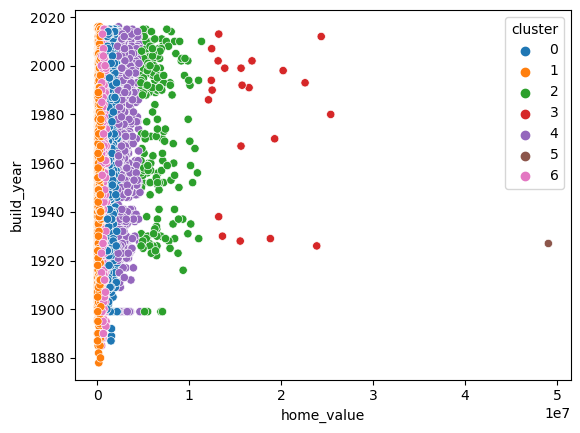

In [37]:
sns.scatterplot(x='home_value', y='build_year', hue='cluster', data=zillow, palette='tab10')
plt.show()

## Bonus

#### Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing

#### Visualize the data and guess the number and shape of the clusters.

#### Implement the KMeans algorithm on unscaled data and visualize the clusters.

#### Repeat the step above but with scaled data.

#### Write down the takeaways from this exercise.